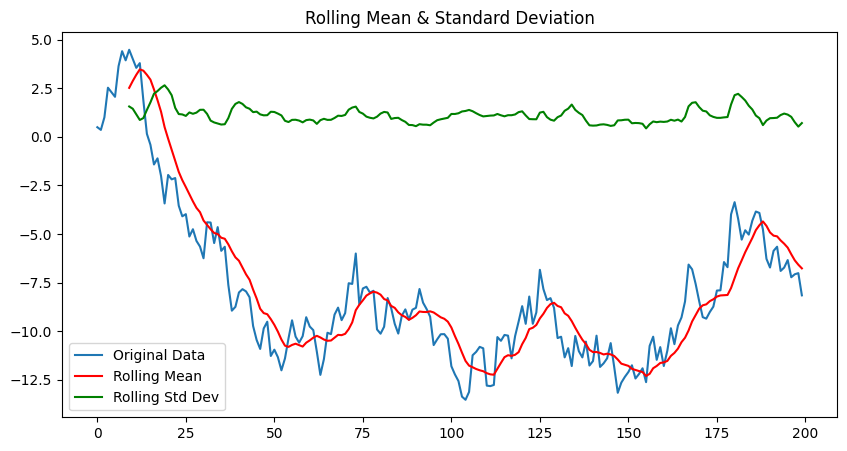

Augmented Dickey-Fuller (ADF) Test:
ADF Statistic: -2.3073
p-value: 0.1696
Critical Values: {'1%': -3.4636447617687436, '5%': -2.8761761179270766, '10%': -2.57457158581854}
Conclusion: The time series is Non-Stationary.

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:
KPSS Statistic: 0.7001
p-value: 0.0135
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: The time series is Non-Stationary.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

def generate_time_series(n=100, seed=42):
    np.random.seed(seed)
    return np.cumsum(np.random.randn(n))

def adf_test(series):
    result = adfuller(series)
    print("Augmented Dickey-Fuller (ADF) Test:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print("Conclusion: The time series is Stationary.\n")
    else:
        print("Conclusion: The time series is Non-Stationary.\n")

def kpss_test(series):
    result = kpss(series, regression='c', nlags='auto')
    print("Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:")
    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", result[3])
    if result[1] < 0.05:
        print("Conclusion: The time series is Non-Stationary.\n")
    else:
        print("Conclusion: The time series is Stationary.\n")

def plot_rolling_statistics(series, window=10):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(10,5))
    plt.plot(series, label="Original Data")
    plt.plot(rolling_mean, label="Rolling Mean", color='red')
    plt.plot(rolling_std, label="Rolling Std Dev", color='green')
    plt.legend()
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()

if __name__ == "__main__":
    data = generate_time_series(200)
    df = pd.Series(data)

    plot_rolling_statistics(df)
    adf_test(df)
    kpss_test(df)


Before differencing:
ADF Statistic: -1.3583317659818992
P-Value: 0.6020814791099098
Non-stationary series

After differencing:
ADF Statistic: -10.008881137130237
P-Value: 1.800687720719554e-17
Stationary series


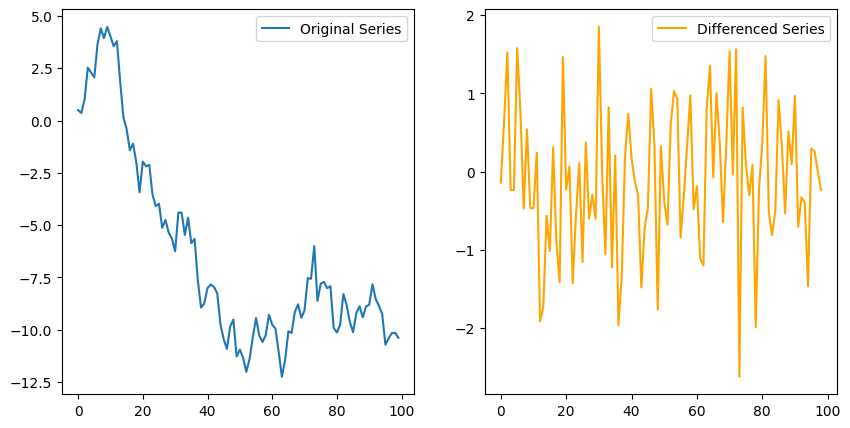

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generate a non-stationary series (random walk)
np.random.seed(42)
n = 100
random_walk = np.cumsum(np.random.randn(n))

# First-order differencing
diff_series = np.diff(random_walk)

# Perform ADF test before and after differencing
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"P-Value: {result[1]}")
    if result[1] < 0.05:
        print("Stationary series")
    else:
        print("Non-stationary series")

print("Before differencing:")
adf_test(random_walk)

print("\nAfter differencing:")
adf_test(diff_series)

# Plot original and differenced series
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(random_walk, label="Original Series")
plt.legend()

plt.subplot(1,2,2)
plt.plot(diff_series, label="Differenced Series", color='orange')
plt.legend()
plt.show()


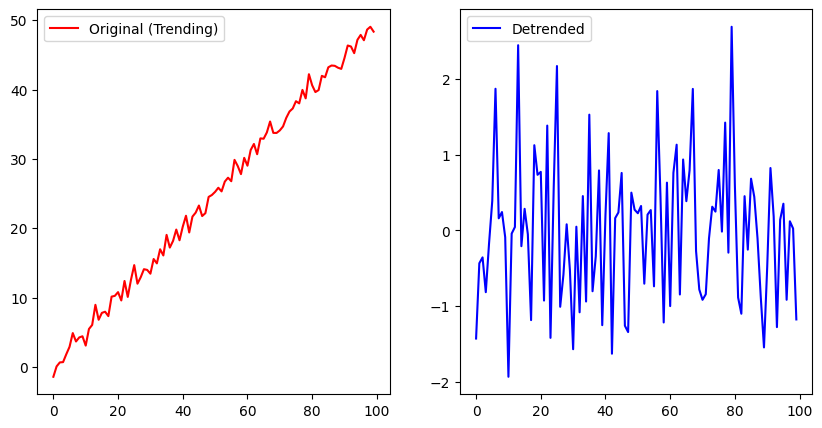


After detrending:
ADF Statistic: -10.872582261011827
P-Value: 1.3566602082595184e-19
Stationary series


In [3]:
from scipy.stats import linregress

# Generate a trending time series
time = np.arange(n)
trend_series = 0.5 * time + np.random.randn(n)

# Fit a linear trend
slope, intercept, _, _, _ = linregress(time, trend_series)
trend = slope * time + intercept

# Remove trend
detrended_series = trend_series - trend

# Plot the original and detrended series
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(trend_series, label="Original (Trending)", color='red')
plt.legend()

plt.subplot(1,2,2)
plt.plot(detrended_series, label="Detrended", color='blue')
plt.legend()
plt.show()

print("\nAfter detrending:")
adf_test(detrended_series)
